# NBAOLSS: Project

Chantal Rikse & Nigel Overmars

In [2]:
import numpy

from fvm import Continuation
from fvm import Interface
from fvm import utils
from fvm import plot_utils

from jadapy import jdqz

from fvm.JadaInterface import JadaInterface, JadaOp

import matplotlib.pyplot as plt

## a)

In [32]:
dim = 2
dof = 3
nx = 64
ny = nx
nz = 1
n = dof * nx * ny * nz

# Define a point of interest
poi = (nx // 2 - 1, ny // 4 - 1)

# Define the problem
parameters = {'Problem Type': 'Lid-driven cavity',
              # Problem parameters
              'Reynolds Number': 1,
              'Lid Velocity': 0,
              # Value describes the value that is traced in the continuation
              # and time integration methods
              'Value': lambda x: utils.create_state_mtx(x, nx, ny, nz, dof)[poi[0], poi[1], 0, 0]}

interface = Interface(parameters, nx, ny, nz, dim, dof)

print('Looking at point ({}, {})'.format(interface.discretization.x[poi[0]],
                                         interface.discretization.y[poi[1]]))

continuation = Continuation(interface, parameters)

# Compute an initial guess
x0 = numpy.zeros(dof * nx * ny * nz)
steady_sol = continuation.continuation(x0, 'Lid Velocity', 0, 1, 0.1)[0]

Looking at point (0.5, 0.25)
Newton corrector converged in 0 iterations with ||F||=5.603022e-06
Lid Velocity: 0.025433
Newton corrector converged in 0 iterations with ||F||=5.042720e-05
Lid Velocity: 0.076298
Newton corrector converged in 1 iterations with ||F||=1.322450e-10
Lid Velocity: 0.178031
Newton corrector converged in 1 iterations with ||F||=3.349971e-10
Lid Velocity: 0.381502
Newton corrector converged in 1 iterations with ||F||=8.119144e-09
Lid Velocity: 0.788461
Newton corrector converged in 1 iterations with ||F||=1.298633e-07
Lid Velocity: 1.602410
Newton corrector converged in 1 iterations with ||F||=2.138273e-09
Lid Velocity: 1.000020
Newton corrector converged in 0 iterations with ||F||=1.048031e-07
Lid Velocity: 1.000000
Convergence achieved onto target Lid Velocity = 1.000000


## b)

In [44]:
ds = 100
target = 5000
steady_sol_5k, mu, data1 = continuation.continuation(steady_sol, 'Reynolds Number', 0, target, ds)


Newton corrector converged in 2 iterations with ||F||=1.159188e-06
Reynolds Number: 99.933425
Newton corrector converged in 3 iterations with ||F||=2.198258e-05
Reynolds Number: 249.939521
Newton corrector converged in 2 iterations with ||F||=4.245434e-05
Reynolds Number: 399.945623
Newton corrector converged in 2 iterations with ||F||=3.799340e-05
Reynolds Number: 624.954777
Newton corrector converged in 2 iterations with ||F||=3.282885e-05
Reynolds Number: 962.468511
Newton corrector converged in 2 iterations with ||F||=2.544953e-05
Reynolds Number: 1468.739111
Newton corrector converged in 1 iterations with ||F||=8.189834e-05
Reynolds Number: 2228.145012
Newton corrector converged in 3 iterations with ||F||=1.295162e-06
Reynolds Number: 3746.956814
Newton corrector converged in 1 iterations with ||F||=6.619529e-05
Reynolds Number: 5265.768616
Newton corrector converged in 0 iterations with ||F||=5.428910e-05
Reynolds Number: 5000.000000
Convergence achieved onto target Reynolds Numb

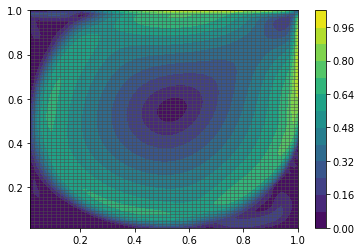

In [39]:
velocity_10k = plot_utils.create_state_mtx(steady_sol_10k, nx, ny, nz, dof)
plot_utils.plot_velocity_magnitude(velocity_10k[:, :, 0, 0], velocity_10k[:, :, 0, 1], interface)

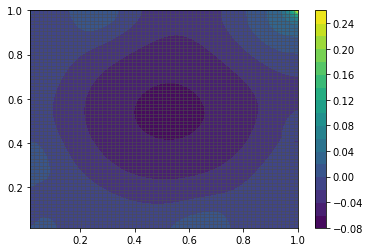

In [42]:
# Plot the pressure
plot_utils.plot_value(velocity_10k[:, :, 0, 2], interface)

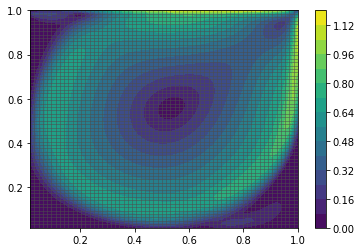

In [45]:
velocity_5k = plot_utils.create_state_mtx(steady_sol_5k, nx, ny, nz, dof)
plot_utils.plot_velocity_magnitude(velocity_5k[:, :, 0, 0], velocity_5k[:, :, 0, 1], interface)

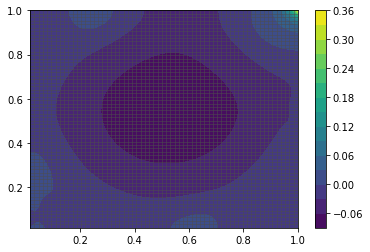

In [46]:
# Plot the pressure
plot_utils.plot_value(velocity_5k[:, :, 0, 2], interface)

## c)

In [ ]:
sizes = [64, 128, 256]#, 512]
dim = 2
dof = 3
nz = 1

for nx in sizes:
    print("Currently looking at nx=ny={}".format(nx))
    ny = nx
    n = dof * nx * ny * nz

    # Define a point of interest
    poi = (nx // 2 - 1, ny // 4 - 1)

    # Define the problem
    parameters = {'Problem Type': 'Lid-driven cavity',
              # Problem parametes
              'Reynolds Number': 1,
              'Lid Velocity': 0,
              'Grid Stretching Factor': 1.5,
              'Verbose': True,
              # Value describes the value that is traced in the continuation
              # and time integration methods
              'Value': lambda x: utils.create_state_mtx(x, nx, ny, nz, dof)[poi[0], poi[1], 0, 0]}

    interface = Interface(parameters, nx, ny, nz, dim, dof)

    continuation = Continuation(interface, parameters)

    # Compute an initial guess
    x0 = numpy.zeros(dof * nx * ny * nz)
    steady_sol = continuation.continuation(x0, 'Lid Velocity', 0, 1, 0.1)[0]
    print("Finished calculating starting solution for nx=ny={}".format(nx))
    print()
    
    ds = 100
    target = 5000
    steady_sol_5k, mu, data1 = continuation.continuation(steady_sol, 'Reynolds Number', 0, target, ds)


Currently looking at nx=ny=64
Newton corrector converged in 0 iterations with ||F||=4.656277e-07
Lid Velocity: 0.008542
Newton corrector converged in 0 iterations with ||F||=4.190650e-06
Lid Velocity: 0.025626
Newton corrector converged in 0 iterations with ||F||=2.281576e-05
Lid Velocity: 0.059794
Newton corrector status at iteration 0: ||F||=1.047662e-04, ||dx||=6.684396e-02
Newton corrector converged in 1 iterations with ||F||=3.704063e-11
Lid Velocity: 0.128131
Newton corrector status at iteration 0: ||F||=1.331695e-04, ||dx||=8.496481e-02
Newton corrector converged in 1 iterations with ||F||=5.984699e-11
Lid Velocity: 0.264803
Newton corrector status at iteration 0: ||F||=7.152010e-04, ||dx||=4.563052e-01
Newton corrector converged in 1 iterations with ||F||=1.726143e-09
Lid Velocity: 0.538145
Newton corrector status at iteration 0: ||F||=2.860780e-03, ||dx||=1.825096e+00
Newton corrector converged in 1 iterations with ||F||=2.761465e-08
Lid Velocity: 1.084816
Newton corrector sta

Newton corrector status at iteration 0: ||F||=3.293338e-04, ||dx||=3.206973e+00
Newton corrector converged in 1 iterations with ||F||=1.351283e-09
Lid Velocity: 0.867829
Newton corrector status at iteration 0: ||F||=1.916972e-03, ||dx||=1.866595e+01
Newton corrector converged in 1 iterations with ||F||=4.577142e-08
Lid Velocity: 1.742448
Newton corrector status at iteration 0: ||F||=1.639356e-04, ||dx||=1.596524e+00
Newton corrector converged in 1 iterations with ||F||=3.348128e-10
Lid Velocity: 1.000008
Newton corrector converged in 0 iterations with ||F||=1.029371e-08
Lid Velocity: 1.000000
Convergence achieved onto target Lid Velocity = 1.000000
Finished calculating starting solution for nx=ny=256

Newton corrector status at iteration 0: ||F||=2.666030e+00, ||dx||=6.614165e+03
Newton corrector converged in 1 iterations with ||F||=6.489410e-05
Reynolds Number: 100.069553
Newton corrector status at iteration 0: ||F||=5.307788e+00, ||dx||=1.277102e+04
Newton corrector status at iterati

We observe that for bigger problem sizes, we are taking bigger steps in our Newton algorithm, i.e. $\|dx\|$ is bigger.